# Introduction
*The project is aimed at implementing the whole data anaysis wrangling process which is categorized into three main stages in our case*

***Project Details***
>    *  **The data gathering Phase :** The twitter_archive_enhanced.csv file was presented for the project within the Udacity classroom which was downloaded manually. As is mostly known, this data was in short both dirty and messy and hence required a great deal of skills to get it to the desired format.*
>    *  **The Assessment Phase:** During this phase of the project, attempts were made to gather all possible Issues within each of the datasets provided. Assessment of the data were group into two main types; “Quality” and “Tidy” issues.*
>    *  **The Cleanining Phase:** A cleaning phase where data was cleaned using three main approaches in terms of defining, Coding and Testing*
>    *  **Storing the Cleaned Data:** The cleaned data was stored in a csv format and a copy was made for the analysis phase*
>    *  **Analysis and Visualizations:** Analysis and Visualizations of the dataset was made using Matlabs matplotlib library and the seaborn library*
*  ***Tools needed for this project may includes:***
>  *  *Jupiter notebook or any python running applicatoion*
>  *  *Doc handling softwares*

In [118]:
import requests
import json
import os
import ast
import time
import datetime
import random
import tweepy
import numpy as np
import pandas as pd

# set the option to display the full string from a pandas DataFrame
pd.options.display.max_rows
# get option to get maximum columns displayed
pd.get_option("display.max_columns")


20

# Gathering Data
***Brief Description***

## *twitter Archive file*

In [119]:
# importing the twitter-archive-csv file
df_archive =pd.read_csv('twitter-archive-enhanced.csv')

# displaying the first two rows of the dataset
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


## *Image predictions file*

In [120]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# requesting for the image predictions data from the url above
response = requests.get(url)

# displaying the response given after requesting for the url
response

<Response [200]>

In [121]:
# Save response to file
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [122]:
# reading from the saved image_predictions dataset
df_img_predict =pd.read_csv('image_predictions.tsv', sep='\t')
df_img_predict.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


## *Twitter Api*

***Assessing the twitter api***

In [123]:

consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)


In [126]:
# Testing the api with '889531135344209921'
id_of_tweet = '889531135344209921'
tweet = api.get_status(id_of_tweet, tweet_mode='extended')._json
tweet

{'created_at': 'Mon Jul 24 17:02:04 +0000 2017',
 'id': 889531135344209921,
 'id_str': '889531135344209921',
 'full_text': "This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq",
 'truncated': False,
 'display_text_range': [0, 118],
 'entities': {'hashtags': [{'text': 'BarkWeek', 'indices': [109, 118]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 889531127467266049,
    'id_str': '889531127467266049',
    'indices': [119, 142],
    'media_url': 'http://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg',
    'url': 'https://t.co/y70o6h3isq',
    'display_url': 'pic.twitter.com/y70o6h3isq',
    'expanded_url': 'https://twitter.com/dog_rates/status/889531135344209921/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 510, 'h': 680, 'resize': 'fit

## *Download jason_tweets*

In [127]:
archive_tweet_ids = list(df_archive['tweet_id']) 
len(archive_tweet_ids)

2356

***The first 100 archive twitter ids were used to test the efficiency of the api assessment as using all the tweet_ids generated a "rate limit reached" error which was taking too long to retreive in my case***

In [130]:
api_json = [] # save all succesfull tweet id's in list
failed_tweet_ids = [] # save all failed twet id's in list
count = 0 # Setting up a counter to ensure we tell our progress due to the number of tweet ids expected

print(f'total number of ids: {len(archive_tweet_ids)}')
start_time = time.time()
for tweet_id in archive_tweet_ids[:100]:# Using tweet_id from first 100 tweets to test code below
    count += 1;
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')._json
        api_json.append(tweet)
        
    except Exception as e:
            print(f'tweet_id: {str(tweet_id)} was not found"  Error: {e}')
            failed_tweet_ids.append(str(tweet_id))
            pass
    
    if count % 50 == 0:
        print(f'loop number: {str(count)}')

time_elapsed = time.time() - start_time
time_spent = time.strftime("%H:%M:%S", time.gmtime(time_elapsed))
print("\nTime elapsed (HH:MM:SS):  " + time_spent + "\n")

print(f"Number of Successful Id's : {len(api_json)}")
print(f"Number of TweetErrors     :  {len(failed_tweet_ids)}\n")


total number of ids: 2356
tweet_id: 888202515573088257 was not found"  Error: 404 Not Found
144 - No status found with that ID.
loop number: 50
tweet_id: 873697596434513921 was not found"  Error: 404 Not Found
144 - No status found with that ID.
loop number: 100

Time elapsed (HH:MM:SS):  00:01:35

Number of Successful Id's : 98
Number of TweetErrors     :  2



In [131]:
# Displaying json file received from api
api_json

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'}

## *Save Jason data as tweet_json.txt file*

*The tweet_json.txt file was downloaded manually from the udacity classroom as because the json file being requested from the api was not responding for several hours after encountering a **"rate limit reached"** error.*

In [132]:
# used a different name to avoid conflict with json file I actually used for the project
file_name = 'my_tweet_json.txt' 
    
with open(file_name, 'w') as text_file:
    for json_tweet in api_json:
        json.dump(json_tweet, text_file)
        text_file.write('\n')        


In [133]:
# checking existence of json file written into a txt format in local drive
ls my_tweet_json.txt

 Volume in drive D is ABBEY
 Volume Serial Number is 0A3B-0506

 Directory of D:\jupiter_files\data_wrangling\project_2

06/26/2022  12:12 PM           477,048 my_tweet_json.txt
               1 File(s)        477,048 bytes
               0 Dir(s)  64,458,944,512 bytes free


***At this point the twet_json.txt file from classromm was also downloaded***

In [135]:
# checking existence of the tweet_json.txt file downloaded
%ls tweet_json.txt

 Volume in drive D is ABBEY
 Volume Serial Number is 0A3B-0506

 Directory of D:\jupiter_files\data_wrangling\project_2

06/17/2022  02:08 PM        10,609,234 tweet_json.txt
               1 File(s)     10,609,234 bytes
               0 Dir(s)  64,458,944,512 bytes free


## *Read tweet_jason.txt file created, extract data needed and convert to a DataFrame*
*  *Rate limit was reached at different instances and was taking too long to receive the data from twitter hence used the **"tweet_json.txt"** provided in the udacity classroom*
*  ***NB:*** *Reading from the json data from my own api would have provided a list containing different objects, hence the code for reading through would have been different*

In [136]:
needed_from_json = [] # List to store all needed info from json

jason_file = open('tweet_json.txt', 'r') # opens an existing txt file without ovewritting it
for each_line in jason_file: #reads eachline within the txt file
    json_data = json.loads(each_line) #reads the txt into python and parses the JSON

    # extracting variables from the JSON data
    json_id = json_data['id']
    json_retweet_count = json_data['retweet_count']
    json_favorite_count = json_data['favorite_count']

    # creating a dictionary with the JSON data, then adding to the "needed_from_json" list
    json_extracted_columns = {'tweet_id': json_id, 
                 'retweet_count': json_retweet_count, 
                 'favorite_count': json_favorite_count
                }
    needed_from_json.append(json_extracted_columns)

jason_file.close()

# convert the needed_from_jsom list to a DataFrame
df_api_json = pd.DataFrame(needed_from_json, columns = ['tweet_id', 'retweet_count', 'favorite_count'])




In [137]:
# Reading from my own api json saved in a list
needed_from_json_mine = []
with open('my_tweet_json.txt', 'r') as my_json_file:
    each_line = my_json_file.readline() #readline method reads eachline of the file
    while each_line:
        json_data = json.loads(each_line) #reads the txt into python and parses the JSON
        
        # extracting variables from the JSON data
        data_id = json_data['id']
        data_retweet_count = json_data['retweet_count']
        data_favorite_count = json_data['favorite_count']
        
        # creating a dictionary with the JSON data, then adding to the "needed_from_json_mine" list
        json_extracted_columns = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        needed_from_json_mine.append(json_extracted_columns)

        # read the next line of JSON data
        each_line = my_json_file.readline()
        # ----- while -----

# convert the needed_from_json_mine list to a DataFrame
my_df_api_json = pd.DataFrame(needed_from_json_mine, columns = ['tweet_id', 'retweet_count', 'favorite_count'])


In [138]:
# checking the number of json data present in my own api
len(my_df_api_json.tweet_id)

98

In [139]:
# a look at the data from from my own api used
my_df_api_json.sample(5)

,tweet_id,retweet_count,favorite_count
62,879862464715927552,2929,19708
77,877611172832227328,70,0
48,882762694511734784,4097,24798
10,890006608113172480,6153,27040
23,887343217045368832,8815,29593


In [142]:
# checking nuber of json data present in the tweet_json.txt file in downloaded in classroom
len(df_api_json.tweet_id)

2354

In [143]:
# verify json data
df_api_json.sample(5)

,tweet_id,retweet_count,favorite_count
893,759159934323924993,1359,0
353,831262627380748289,2350,13066
852,765222098633691136,3914,12902
1058,741438259667034112,937,4026
2131,670073503555706880,874,1674


## Assessing Data

*Access the gathered data by grouping them into two main categories*
*  **Quality Assessments:** Issues regarding this form of assessment was defined as being dirty. Four main criteria was looked at the most with regards to how dirty the data;*
>  *  *Completness in terms of the wholeness of the dataset*
>  *  *Validity in terms of having the right info at the right place. A value may be accurate but not valid*
>  *  *Accuracy which is the right info in this sense*
>  *  *Consistency in terms of uniformity in values of datasets*
*   **Tidy Assessments:** Issues regarding how messy the data is.
>  *  *structural issues it terms of missing columns, unwanted columns and many others regarding the shape of the dataset*
* Visual Assessments on the data was done by using external softwares like Excel with it filter and sorting functionalities as well as skimming through the first few row of the pandas dataframes

***Save all DataFrames in the form of csv files to make visual assessments using Excell***

In [145]:
# saving the img_predictions and af_api_json dataset to a csv format 
# df_arch already has a csv format in the name of 'twitter-archive-enhanced.csv' at the initial stages

df_img_pred.to_csv("image_predictions_udacity", sep='\t', index=False)
df_api_json.to_csv("twitter_api_json", sep=',', index=False)

In [146]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [147]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [148]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


* *The difference between the **"75th percentile values"** and the **"maximum values"** for both **ratings columns** seems upsurd, hence, would have to be looked into. Also minimum values of ratings being as low as "0" seems disturbing. Could this be because **"they love their dogs Brent?"**.*

In [149]:
df_api_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [150]:
df_api_json.tweet_id.nunique()

2354

In [151]:
df_api_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [152]:
df_img_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [153]:
df_img_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [154]:
# finding out unique values in the image prediction table
df_img_predict.tweet_id.nunique()

2075

*The hash(**"#"**) symbol in front of the issues represents the order in which they were addressed*

### ***Quality Issues(completeness, validity, accuracy, and consistency)***
*  *.**(#6)**. the **"tweet ids"** are integers in all the datasets*
*  *.**(#7)**. 3 **"retweets"** columns in the df_archive with 181 non-null values each*
*  *.**(#10)**. strange values in **"rating numerator"** of df_archive table*
*  *.**(#9)**. strange values in **"rating denominator"** of df_archive table*
*  *.**(#11)**. **"wierd names"** in the names columns in df_archive table such as **"a, an, e,t,c"**.*
*  *.**(#12)**.the **"+0000"** in timestamp column in df_archive table*
*  *.**(#13)**. datatype of **"timestamp"** column of df_archive*
*  *.**(#14)**. href's in **"source"** column of df_archive*
*  *.**(#15)**. datatypes of some columns not valid*
*  *.**(#16)**. undiscriptive column names and unwanted columns*

## ***Tidyness (Structural Issues)***

*  *.**(#5)**. doggo, floofer, pupper and puppo occupying 4 separate columns*
*  *.**(#1)**. the **3** separate **data tables** bearing similar info*
*  *.**(#2)**. df_archive has **"2356"** entries with df_img_pred having **"2075"** entries*
*  *.**(#4)**.**"img_num"** column may not be relevant for analysis*
*  *.**(#8)**. 2 **"reply_retweets"** columns in the df_archive with 78 non-null values each*
*  *.**(#3)**. the **p1,,p2 and p3** columns,  **p1_conf,p2_conf and p3_conf** columns as well as **p1_dog,p2_dog,p3_dog** columns all discusses same information respectively in  df_img_pred table*


# Cleaning Data
*The concepts applied in addressing each of the issues found was applied in two main steps:*
*  **Defining the problem:** *This involves clearly stating how you intentd to solve the problem*
*  **Coding and Testing:** *Laying down your definition in the form of a code as well as running the code to verify whether it yields the result expected*

*Before cleaning the dataset, It is advisable to make a copy of the orginal data. In Cleaning of data, It is deemed a great deal to start with issues related to the structure of the datasets before tackling those regarding the quality aspect.*

*During the data cleaning process we would be checking  in many occassions the existence of columns within dataframes hence, the function below to make that a bit easy

In [155]:
# function to check the presence of a column in a dataframe, applies for only a single column name
def check(column,df):
    if column in df.columns:
        print(True)
    else:
        print(False)

## Make Copy of original DataSets

In [156]:
# make copies of the original datasets
df_arch = df_archive.copy()
df_img_pred = df_img_predict.copy()
df_api = df_api_json.copy()

## Issue #1
*the **3** separate **data tables** bearing similar info*

**Define**
>  *  *Merge all datasets to the df_archive table using the merge function*
>  *  *First merge json data to twitter achive to a new dataframe*
>  *  *Then merge the image predictions table to the merged dataframe then rename the latest dataframe*

**Coding and Testing**

In [157]:
#First merge the jsons data to the twitter archive data
df_archive_1 = pd.merge(df_arch, df_api, on='tweet_id', how='left')

# checking changes made
df_archive_1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,6514.0,33819.0


In [158]:
#check the shape of the new dataframe
df_archive_1.shape

(2356, 19)

In [159]:
# check the shape of the image prediction datframe
df_img_pred.shape

(2075, 12)

In [160]:
# find the difference in the number of rows of the dataframes to be merged
df_archive_1.shape[0]-df_img_pred.shape[0]

281

*It is worth nothing that, the **df_img_pred** table has **"281"** rows less than the **df_archive_1** table. This shall be delved into as the next issue*

In [161]:
# merge image prediction dataframe to the merged dataframe
df_archive_2 = pd.merge(df_archive_1, df_img_pred, on='tweet_id', how='left')
df_archive_2.shape

(2356, 30)

In [162]:
# make a copy of all the tables merged together
df_all = df_archive_2.copy()

In [163]:
# Findout the shape of the dataset
df_all.shape

(2356, 30)

In [164]:
# find make a quick check throught the dataset
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

# Issue #2
*df_arch has **"2356"** entries with df_img_pred having **"2075"** entries*

*Since the tables have now been merged together at this point, the difference in row numbers which was **281** basically implies there are rows with missing image predictions url. Lets now find those rows and drop them*

**Define**
>  *  *Exclude all rows with missing jpg_url values*
>  *  *Query the data for rows with no jpg_url values*

**Coding and Testing**

In [165]:
# Excluding all rows without jpg_url values
df_all = df_all[df_all.jpg_url.notna()]


*Lets now query the data for rows with no jpg_url values*

In [166]:
# Verifying changes made to the dataset
df_all[df_all.jpg_url.isna()] # gets data for row without jpg_url

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Issue #3
*the **p1,p2 and p3** columns,  **p1_conf,p2_conf and p3_conf** columns as well as **p1_dog,p2_dog,p3_dog** columns all discusses same information respectively in  df_img_pred table*
>   *  *With the 3 modules used, any of whose prediction is **"True"**, we consider the name attached to it a being a dog. As a result, we would try and loop over all the prediction modules to find out those predictions are considered as **"True"**.*
>   *  *Our aim then, is to come up with 3 columns with one being the **"name of the dog"**, the other being **"whether or not it is a dog"** as well as the **"confidence level for that prediction"**.*

**Define**
>  *  *Create a list that contains the conditions needed to be met*
>  *  *Create another list with choices for the breed of dog based on the conditions provided*
>  *  *Create a third list with choices for the confidence level for the list of conditions*
>  *  *Set the default value for the breed to be **"no_breed"** and the default for the confidence level to be **"0"**. This may occur when a dog is not categorized under any of the breeds*
>  *  *With **"numpy's .select"** function, loop through the various conditions and make a choice based on that condition.*
>  *  *Drop columns **'p1','p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'**.*

**Coding and Testing**

In [167]:
# lets have a look at the first two rows of the data again
df_all.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [168]:
# source https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column

# setting up conditions and choices to make for the new data frames
conditions = [(df_all['p1_dog'] == True), (df_all['p2_dog'] == True), (df_all['p3_dog'] == True)]
breed_choices = [df_all['p1'], df_all['p2'], df_all['p3']]
confidence_choices = [df_all['p1_conf'], df_all['p2_conf'], df_all['p3_conf']]

# Assign new columns based on the choices and selections given above
df_all['breed'] = np.select(conditions, breed_choices, default='no_breed') # the index within the conditions corresponds to the index within the choices
df_all['confidence_level'] = np.select(conditions, confidence_choices, default= 0)


In [169]:
# verify columns created
df_all[['breed','confidence_level']].sample(3)

,breed,confidence_level
2091,no_breed,0.000000
262,Labrador_retriever,0.029340
1455,pug,0.997445


In [170]:
# check shape of present dataframe
df_all.shape


(2075, 32)

In [171]:
# dropping clumns ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
df_all = df_all.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

# Verifying the absence of the columns dropped
df_all.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,breed,confidence_level
666,790581949425475584,NaN,NaN,2016-10-24 15:53:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duke. He sneaks into the fridge sometimes. It's his safe place. 11/10 would give little jacket if necessary https://t.co/Fd5WFDTMH4,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/790581949425475584/photo/1,https://twitter.com/dog_rates/status/790581949425475584/photo/1",...,None,None,None,None,8183.0,22473.0,https://pbs.twimg.com/media/Cvi2FiKWgAAif1u.jpg,2.0,malinois,0.000153
2245,667885044254572545,NaN,NaN,2015-11-21 01:59:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Stu. Stu has stacks on stacks and an eye made of pure gold. 10/10 pay for my tuition pls https://t.co/7rkYZQdKEd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667885044254572545/photo/1,...,None,None,None,None,530.0,868.0,https://pbs.twimg.com/media/CUTN5V4XAAAIa4R.jpg,1.0,malamute,0.088530


## Issue #4
*.**"img_num"** and **"expanded_urls"** column may not be relevant for analysis*

**Define**
>  *  *Drop the columns **"ing_num"** and **"expanded_urls"** *

**Coding and Testing**

In [172]:
# dropping img_num column
df_all = df_all.drop(['img_num', 'expanded_urls'], axis =1)

# verify column is dropped with function created above
check('img_num', df_all), check('expanded_urls',df_all)

False
False


(None, None)

## Issue #5
*doggo, floofer, pupper and puppo occupying 4 separate columns*
*  *A quick visual assessment of the various stages using the filter function in an excel sheet on the original twitter archive dataset reveals there are some breed of dogs that are between transitions, that is, have 2 stages they are inolved into*

**Define**
>  *  *Melt all the columns into one giving it a name of dog_stage*
    >  >* *change any instance of None to **"0"** and otherwise to **"1"** in all the 4 column stages.*
    >  >* *Create a new dataframe called **"no_stage"** which would be equal to the sum of all instances with stage being equal to **"0"**.*
    >  >* *Create a function that would use **"the name of the stage if it exist"** and **"none"** if otherwise.*
    >  >* *Create a new dataframe called **"dog_stage"** of whose values would be based on the function described*
        >  >* *Drop the original four stages columns that is, **'doggo', 'floofer', 'pupper', 'puppo'** as well as the **"no_stage"** dataframe created..*

**Coding and Testing**

In [173]:
# replace all instances of a stage name with 1, and 'None' with 0
no_stage = lambda x: 0 if x == 'None' else 1

df_all.doggo = df_all.doggo.apply(no_stage)
df_all.floofer = df_all.floofer.apply(no_stage)
df_all.pupper = df_all.pupper.apply(no_stage)
df_all.puppo = df_all.puppo.apply(no_stage)

# adding all instances of the value "None" for each of the stage colulmns
df_all['no_stage'] = df_all['doggo'] + df_all['floofer'] + \
                        df_all['pupper'] + df_all['puppo']

# have a look at what we have before we continue...
df_all['no_stage'].value_counts()

0    1754
1     308
2      13
Name: no_stage, dtype: int64

*The stats displayed implies there are **"1754"** instances where there were no dog stages assigned as values, while for **"308"** times, a dog was transitioning, but as indicated above, using visual assessment, the instances with a dog being between transitions, this time arround 2 transitions is clearly indicated as **"13"** dogs being involved. These may be of any combination of two of any of the 4 dog stages*

In [174]:
# It should be notted that, at this point, all stages if present in cloumn is now == 1
# hence function to convert the 1's if present to the stage names is defined as: 

# source = https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition
def f(row):
    if row['floofer'] == 1:
        stage = 'floofer'
    elif row['puppo'] == 1:
        stage = 'puppo'
    elif row['doggo'] == 1:
        stage = 'doggo'
    elif row['pupper'] == 1:
        stage = 'pupper'
    else:
        stage = 'none'
    return stage


In [175]:
# creating a new dataframe called "dog_stage" and applying the function above to it
df_all['dog_stage'] = df_all.apply(f, axis=1)

# Verifying change made
df_all.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,breed,confidence_level,no_stage,dog_stage
1969,673317986296586240,NaN,NaN,2015-12-06 01:48:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Take a moment and appreciate how these two dogs fell asleep. Simply magnificent. 10/10 for both https://t.co/juX48bWpng,NaN,NaN,NaN,10,...,0,0,0,293.0,924.0,https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg,miniature_pinscher,0.384099,0,none
793,773547596996571136,NaN,NaN,2016-09-07 15:44:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chelsea. She forgot how to dog. 11/10 get it together pupper https://t.co/nBJ5RE4yHb,NaN,NaN,NaN,11,...,0,1,0,7126.0,24553.0,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,Norwegian_elkhound,0.372202,1,pupper


In [176]:
# drop the 'doggo', 'floofer', 'pupper', 'puppo', and the 'no_stage' column
df_all = df_all.drop(['doggo', 'floofer', 'pupper', 'puppo', 'no_stage'], axis=1)

*.**# NB:** by helping us come up with the **"stage"** column, the **"no_stage"** column only tells us the the number of transitions or stages a dog was into which would not be needed in our analysis*

In [177]:
# verifying changes made
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   rating_numerator            2075 non-null   int64  
 10  rating_denominator          2075 non-null   int64  
 11  name                        2075 non-null   object 
 12  retweet_count               2073 non-null   float64
 13  favorite_count              2073 

## Issue #6
*the **"tweet ids"** are integers in all the datasets*
*  *Since the tweet id's would not be needed for any computations, it is would be advisable to convert it to a datatype of which the computer would not have to spend extra effort for its computation.*
*  *All the datasets are now merged together hence the only tweet id now would be the one on th combined dataset, that is the df_all dataframe.*

**Define**
>  *  *Check the datatype for the **"tweet_id"** column*
>  *  *Change the **"tweet_id"** datatype to string type object if not*

**Coding and Testing**

In [178]:
# Checking datatype of the tweet_id column
df_all.tweet_id.dtype

dtype('int64')

In [179]:
# converting tweet_id datatype to a str
df_all.tweet_id = df_all.tweet_id.astype(str)

In [180]:
# verifying change made to tweet_id datatype
df_all.tweet_id.dtype

dtype('O')

# Issue #7
*3 **"retweets"** columns in the df_archive with 181 non-null values each*
*  *The value **"181"** at this point has been reduced significantly*

**Define**
>  *Exclude rows whose **'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'** have values*

**Coding and Testing**

In [181]:
# Excluding rows with retweeted_status_id not equall to null
df_all = df_all[~(df_all.retweeted_status_id.notnull())]

In [182]:
# veruifying changes made
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   rating_numerator            1994 non-null   int64  
 10  rating_denominator          1994 non-null   int64  
 11  name                        1994 non-null   object 
 12  retweet_count               1994 non-null   float64
 13  favorite_count              1994 

*The **"".info"** method reveals both **'retweeted_status_timestamp' and 'retweeted_status_user_id'** are in a way related to the **'retweeted_status_id'** hence also got affected in the process.*

*All the retweets columns at this moment has no values hence we would want to drop those columns to tidy up our dataset*

**Dropping all retweeted columns**
>  *It should be notted that, this is a **tidy Issue** which could be handled best at this point of the project*

**Define**
>  *Drop the 'retweeted_status_id', 'retweeted_status_user_id' and the 'retweeted_status_timestamp' columns*

**Coding and Testing**

In [183]:
# dropping columns 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'
df_all = df_all.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [184]:
#verifying changes made
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   object 
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   rating_numerator       1994 non-null   int64  
 7   rating_denominator     1994 non-null   int64  
 8   name                   1994 non-null   object 
 9   retweet_count          1994 non-null   float64
 10  favorite_count         1994 non-null   float64
 11  jpg_url                1994 non-null   object 
 12  breed                  1994 non-null   object 
 13  confidence_level       1994 non-null   float64
 14  dog_stage              1994 non-null   object 
dtypes: f

# Issue #8

*2 **"reply_retweets"** columns in the df_archive with 78 non-null values each*
*  *This value at this point has significantly reduced*

**Define**
>  *Drop **'in_reply_to_status_id' and 'in_reply_to_user_id'** columns*

**Coding and Testing**

In [185]:
# drop columns 'in_reply_to_status_id' and 'in_reply_to_user_id'
df_all = df_all.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)


In [186]:
# verifying changes made
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   object 
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   rating_numerator    1994 non-null   int64  
 5   rating_denominator  1994 non-null   int64  
 6   name                1994 non-null   object 
 7   retweet_count       1994 non-null   float64
 8   favorite_count      1994 non-null   float64
 9   jpg_url             1994 non-null   object 
 10  breed               1994 non-null   object 
 11  confidence_level    1994 non-null   float64
 12  dog_stage           1994 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 218.1+ KB


# Issue #9

*strange values in **"rating_denomimator"** of df_archive table*
*  *In as much as the ratings of **"WeRateDogs"** is questioned by most people, it seems to have a constant denominator value of **"10"** for most of its ratings. In this project we would want to maintain a column rating of **"10"** for all our rating_denominators for a much comprehensible understanding of our data*

In [187]:
# brief description of the rating columns
df_all[['rating_denominator','rating_numerator']].describe()

,rating_denominator,rating_numerator
count,1994.000000,1994.000000
mean,10.532096,12.280843
std,7.320710,41.497718
min,2.000000,0.000000
25%,10.000000,10.000000
50%,10.000000,11.000000
75%,10.000000,12.000000
max,170.000000,1776.000000


>  * *The describe function shows there are vallues within the denominator greater than or or less than **"10"** with most of them being **"10"**.*
>  * *Lets have a look at th values not equall to **"10"** and the number of times they appear*

In [188]:
# finding all denominators greator than 10
df_all[['rating_denominator']].query('rating_denominator != 10').value_counts()

rating_denominator
50                    3
11                    2
80                    2
2                     1
7                     1
20                    1
40                    1
70                    1
90                    1
110                   1
120                   1
130                   1
150                   1
170                   1
dtype: int64

*Lets now eliminate these rows of whose denominator values are not equal to **"10"**.*

**Define**
>  *  *Drop row whose rating_denomintor value is not equal to **"10"**.*

**Coding and Testing**

In [189]:
# Excluding rating denominators not equal to 10
df_all = df_all[~(df_all.rating_denominator != 10)] # where ~ means not or exclude

In [190]:
# Verify  the sum of denominator values not equal to 10 present
df_all[['rating_denominator']].query('rating_denominator != 10').value_counts().sum()

0

# Issue #10
*strange values in **"rating numerator"** of df_archive table*
*  *We would want to maintain a rating_numerator maximum of 15 for our data.*

*The description above shows there are rating_numerators greater than the value **"15"** of which we are interested in*

**Define**
>  *Drop 'ratings_numerator' values greater than **"15"**.*

**Coding and Testing**

In [191]:
# dropping rating numerators greater than 15
df_all = df_all[~(df_all.rating_numerator > 15)]

In [192]:
# Checking for changes made
df_all[['rating_numerator']].query('rating_numerator > 15').value_counts().sum()

0

In [193]:
# making further verification on numerator and denominator values
df_all[['rating_numerator','rating_denominator']].value_counts()

rating_numerator  rating_denominator
12                10                    450
10                10                    419
11                10                    396
13                10                    261
9                 10                    150
8                 10                     95
7                 10                     51
14                10                     35
5                 10                     33
6                 10                     32
3                 10                     19
4                 10                     15
2                 10                      9
1                 10                      4
0                 10                      2
dtype: int64

*A visual assessment of the dataframe above shows a unique denominator value of **"10"** and no rating numerator not grater than **"15"** as required*

# Issue #11
*.**"wierd names"** in the names columns in df_archive table such as **"a, an, e,t,c"**.*
*  *A visual assessment of the dataset in the twitter csv file shown most these weird names begun with small letters and the those that did not were much meaningful to be names in my opinion*

In [194]:
pd.set_option('display.max_colwidth', None) #sets columns width to unlimited

# displaying the names whose values starts with a lower case letter
list(df_all[df_all['name'].str[0].str.islower()]['name'])

['such',
 'a',
 'quite',
 'quite',
 'one',
 'incredibly',
 'a',
 'a',
 'very',
 'my',
 'one',
 'not',
 'his',
 'one',
 'a',
 'a',
 'a',
 'an',
 'very',
 'a',
 'just',
 'getting',
 'very',
 'unacceptable',
 'all',
 'a',
 'a',
 'infuriating',
 'a',
 'a',
 'an',
 'a',
 'a',
 'very',
 'getting',
 'just',
 'a',
 'the',
 'the',
 'actually',
 'by',
 'a',
 'officially',
 'a',
 'the',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'one',
 'a',
 'a',
 'a',
 'light',
 'just',
 'space',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'an',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'quite',
 'a',
 'an',
 'a',
 'the',
 'the',
 'a',
 'a',
 'an',
 'a',
 'a',
 'a',
 'a']

>  * *The data displayed shows that all the names that starts with the lowercase letters seemed incorrect*
>  * *As a result, we would want to replace all such names with a value of "None"*

**Lets find the total number of the starting with lower case values**

In [195]:
len(list(df_all[df_all['name'].str[0].str.islower()]['name']))

95

In [196]:
# fnding the total number of names equivalent to "None"
len(df_all[['name']].query('name == "None"'))

532

In [197]:
# total of names equivalent to "None" and names whose starting letters are lowercase
len(df_all[['name']].query('name == "None"')) + len(list(df_all[df_all['name'].str[0].str.islower()]['name']))

627

**Define**
>  *replace all names that starts with a lowercase letters to **"None"**.*

**Coding and Testing**

In [198]:
# soure: https://pythonguides.com/pandas-replace-multiple-values/

#  where name column value starts with lowercase, replace with none
df_all.loc[(df_all['name'].str.contains(r'^[a-z]')), 'name'] = 'None' #(r'^[a-z]'), a regex to check leading letters included in lowercase a to z


In [199]:
# Verifying column values in "name" that starts with a lowercase letter
len(list(df_all[df_all['name'].str[0].str.islower()]['name']))

0

In [200]:
# Checking total number of name column with a value of "None"
len(df_all[['name']].query('name == "None"'))

627

In [201]:
# Checking unique values in the names columns
list(df_all.name.value_counts().keys())

['None',
 'Charlie',
 'Cooper',
 'Oliver',
 'Lucy',
 'Penny',
 'Tucker',
 'Winston',
 'Sadie',
 'Daisy',
 'Toby',
 'Lola',
 'Jax',
 'Bo',
 'Stanley',
 'Bella',
 'Koda',
 'Dave',
 'Scout',
 'Leo',
 'Bailey',
 'Buddy',
 'Rusty',
 'Oscar',
 'Milo',
 'Louis',
 'Chester',
 'Phil',
 'Brody',
 'Oakley',
 'Bear',
 'Clarence',
 'Finn',
 'Jerry',
 'Alfie',
 'Dexter',
 'Larry',
 'Reggie',
 'Scooter',
 'Winnie',
 'George',
 'Bentley',
 'Clark',
 'Jack',
 'Duke',
 'Derek',
 'Cassie',
 'Chip',
 'Gary',
 'Maggie',
 'Gus',
 'Archie',
 'Moose',
 'Sophie',
 'Wyatt',
 'Riley',
 'Earl',
 'Bruce',
 'Calvin',
 'Reese',
 'Sunny',
 'Nala',
 'Kyle',
 'Waffles',
 'Lily',
 'Loki',
 'Wallace',
 'Olive',
 'Malcolm',
 'Jeffrey',
 'Mia',
 'Samson',
 'Gerald',
 'Zeke',
 'Hank',
 'Max',
 'Wilson',
 'Vincent',
 'Zoey',
 'Sammy',
 'Rosie',
 'Ellie',
 'Beau',
 'Louie',
 'Ruby',
 'Otis',
 'Boomer',
 'Jimothy',
 'Shadow',
 'Sebastian',
 'Steven',
 'Walter',
 'Gizmo',
 'Griffin',
 'Lincoln',
 'Wally',
 'Sampson',
 'Chipson'

# Issue #12
*the **"+0000"** in timestamp column in df_archive table*
*  *All the values within the timestamp seems to have a format of **"2016-06-06 15:40:26 +0000"**.*

**Define**
>  *Extract the **"year"**, **"month"** and **"date"** from all the timestamp values*

**Coding and Testing**

In [202]:
# Extracting year, month and date from timestamp column using regex
df_all['timestamp'] = df_all['timestamp'].astype(str).str.extract(r'(\d{4}.\d{2}.\d{2})')

In [203]:
# Verifying changes made
df_all.timestamp.sample(5)

1060    2016-06-11
403     2017-01-25
2015    2015-12-03
1692    2015-12-28
1151    2016-04-29
Name: timestamp, dtype: object

# Issue #13
*datatype of **"timestamp"** column of df_archive*

**Define**
>  *Convert timestamp of date_time using pd.to_datetime method*

**Coding and Testing**

In [204]:
# change datatype to datetime 
df_all['timestamp'] = pd.to_datetime(df_all['timestamp'])

In [205]:
# Verifying datatype of timestamp column
df_all.timestamp.dtype


dtype('<M8[ns]')

*datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the endian-ness of the machine*

In [206]:
# source: https://stackoverflow.com/questions/29206612/difference-between-data-type-datetime64ns-and-m8ns

# On a machine whose byte order is little endian, there is no difference
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

# Issue #14
*.**"source"** column of df_archive displayed in raw html codes*

In [207]:
# checking value varities with source column
df_all.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1933
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

*There appears to be **"only 3 different value types"** for the source column, hence, we would like to set them into a single group in a regular expression to extract either of them*

**Define**
>  *  *Convert to string and extract text within the **"a"** tag for all **"source"** column values*

**Coding and Testing**

In [208]:
# converting to string and extracting text within the "a" tags of the source column
df_all['source'] = df_all['source'].astype(str).str.extract(r'(Twitter for iPhone|Twitter Web Client|TweetDeck)')

In [209]:
# verifying changes made 
df_all.source.value_counts()

Twitter for iPhone    1933
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

In [210]:
# checking random values for source data
df_all.source.sample(3)

526     Twitter for iPhone
2026    Twitter for iPhone
1669    Twitter for iPhone
Name: source, dtype: object

# Issue #15
*datatypes of some columns not valid*
>  *Lets first have a look a the datatypes for all the columns at the moment*

In [211]:
# Checking datatypes of all data columns 
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   rating_numerator    1971 non-null   int64         
 5   rating_denominator  1971 non-null   int64         
 6   name                1971 non-null   object        
 7   retweet_count       1971 non-null   float64       
 8   favorite_count      1971 non-null   float64       
 9   jpg_url             1971 non-null   object        
 10  breed               1971 non-null   object        
 11  confidence_level    1971 non-null   float64       
 12  dog_stage           1971 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), obje

*Some datatypes seems to have been  corrected from previous cleaning steps above*

**Define**

>  * *Change **"source"**, **"dog_stage"**, **"favorite_count"** and **"retweet_counts"** datatypes to **"category"**, **"category"**, **"int"** and **"int"** dataypes respectively*

**Coding and Testing**

In [212]:
# converting column datatypes to their appropriate formats
df_all['source'] = df_all.source.astype('category')
df_all['dog_stage'] = df_all.dog_stage.astype('category')
df_all['favorite_count'] = df_all.favorite_count.astype(int)
df_all['retweet_count'] = df_all.retweet_count.astype(int)


In [213]:
# verify changes made
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   category      
 3   text                1971 non-null   object        
 4   rating_numerator    1971 non-null   int64         
 5   rating_denominator  1971 non-null   int64         
 6   name                1971 non-null   object        
 7   retweet_count       1971 non-null   int32         
 8   favorite_count      1971 non-null   int32         
 9   jpg_url             1971 non-null   object        
 10  breed               1971 non-null   object        
 11  confidence_level    1971 non-null   float64       
 12  dog_stage           1971 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(1), i

# Issue#16
*undiscriptive column names*
>   *In my opinion, columns names **"timestamp"** and **"favorite_counts"** seems undiscriptive hence would be important to be renamed*

**Define**
>  *Rename **"timestamp"**, **"favorite_counts"** and **"jpg_url"** columns to **"tweet_date"**, **"tweet_url"**, **"num_of_likes"** and **"img_url"** respectively*

**Coding and Testing**

In [214]:
# renaming undiscriptive columns
df_all.rename(columns  = {'timestamp':'tweet_date', 'favorite_count':'num_of_likes', 'jpg_url':'img_url'}, inplace=True)

In [215]:

# verify changes made
df_all.columns


Index(['tweet_id', 'tweet_date', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'retweet_count', 'num_of_likes',
       'img_url', 'breed', 'confidence_level', 'dog_stage'],
      dtype='object')

In [216]:
# Checking dataframe for changes made
df_all.sample(3)

,tweet_id,tweet_date,source,text,rating_numerator,rating_denominator,name,retweet_count,num_of_likes,img_url,breed,confidence_level,dog_stage
1538,689835978131935233,2016-01-20,Twitter for iPhone,Meet Fynn &amp; Taco. Fynn is an all-powerful leaf lord and Taco is in the wrong place at the wrong time. 11/10 &amp; 10/10 https://t.co/MuqHPvtL8c,11,10,Fynn,850,2369,https://pbs.twimg.com/media/CZLKJpDWQAA-5u4.jpg,collie,0.600186,none
563,802572683846291456,2016-11-26,Twitter for iPhone,This is Winnie. She's h*ckin ferocious. Dandelion doesn't even see her coming. 12/10 would pet with caution https://t.co/EFfLCP7oQv,12,10,Winnie,2926,9959,https://pbs.twimg.com/media/CyNPmJgXcAECPuB.jpg,golden_retriever,0.610171,none
2163,669375718304980992,2015-11-25,Twitter for iPhone,This is Billl. He's trying to be a ghost but he's not very good at it. 6/10 c'mon Billl https://t.co/ero0XfdGtY,6,10,Billl,792,1425,https://pbs.twimg.com/media/CUoZqaqWcAAA2MQ.jpg,Airedale,0.168762,none


# Checking for duplicates

In [217]:
# checking for duplicates within dataframe
sum(df_all.duplicated())

0

# Arranging dataset for easier analysis

In [218]:
# checking dataframe columns
df_all.columns

Index(['tweet_id', 'tweet_date', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'retweet_count', 'num_of_likes',
       'img_url', 'breed', 'confidence_level', 'dog_stage'],
      dtype='object')

In [219]:
# rearranging columns for easier analysis
new_arrangement = ['tweet_id', 'num_of_likes', 'retweet_count', 
                   'rating_numerator', 'rating_denominator', 
                   'tweet_date', 'name', 'dog_stage',
                   'breed', 'confidence_level', 'source', 'text', 'img_url']

df_all = df_all[new_arrangement]

In [220]:
# verifying changes to column arrangements
df_all.sample(1)

,tweet_id,num_of_likes,retweet_count,rating_numerator,rating_denominator,tweet_date,name,dog_stage,breed,confidence_level,source,text,img_url
819,770655142660169732,8130,2013,11,10,2016-08-30,None,none,no_breed,0.0,Twitter for iPhone,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,https://pbs.twimg.com/media/CrHqwjWXgAAgJSe.jpg


# Storing Data 
>  *The cleaned dataset will now be saved in a csv format with the name **"twitter_archive_master.csv"**.*
>  *A copy of the cleaned dataset would be made to work with during the analyis phase*

In [221]:
# saving the cleaned dataset in a csv format
df_all.to_csv('twitter_archive_master.csv', index=False)

In [236]:
# checking twitter_archive_master.csv file in local disc
%ls twitter_archive_master.csv

 Volume in drive D is ABBEY
 Volume Serial Number is 0A3B-0506

 Directory of D:\jupiter_files\data_wrangling\project_2

06/26/2022  12:39 PM           536,999 twitter_archive_master.csv
               1 File(s)        536,999 bytes
               0 Dir(s)  64,458,264,576 bytes free


In [222]:
# making a copy of the cleaned dataset
df_master = df_all.copy()

In [223]:
# verify the copy made
df_master.head(2)

,tweet_id,num_of_likes,retweet_count,rating_numerator,rating_denominator,tweet_date,name,dog_stage,breed,confidence_level,source,text,img_url
0,892420643555336193,39467,8853,13,10,2017-08-01,Phineas,none,no_breed,0.000000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,33819,6514,13,10,2017-08-01,Tilly,none,Chihuahua,0.323581,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg


# Analyzing and Visualizing the data
>*Insights based on the cleaned dataset in this case, df_master was generated. The few that was looked into includes;*
>  *  ***What was the most common ratings and which known dog stages were associated with that the most?***
>  *  ***What are the likes most associated to tweets?***
>  *  ***What was the relationship between the number of likes and the retweet counts?***

In [224]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns; sns.set()

### *What was the most common ratings and which known dog stages were associated with that the most?*
*The rating referred to in this case is  the rating_numerator of which different figures were involved in our dataset*

***Lets first have a look at the number of ratings associated with each rating numerator***

In [225]:
# determining the most common rating_numerator value
df_master['rating_numerator'].value_counts()

12    450
10    419
11    396
13    261
9     150
8      95
7      51
14     35
5      33
6      32
3      19
4      15
2       9
1       4
0       2
Name: rating_numerator, dtype: int64

*The most common rating as presented by the data is **"12"** with a total of 450 dogs having this rating.*

*Lets now findout the various **"dog_stages"** associated with this rating of dogs*

In [226]:
df_master.query('rating_numerator == 12')[['dog_stage']].value_counts()

dog_stage
none         378
pupper        47
doggo         17
puppo          6
floofer        2
dtype: int64

*The most common dog rating turns out be for those dogs whose stages are not known, but the question seeks for those dogs of whose stages are known hence we would have eleminate those dogs of whom there are no knowledge of the stages the are invloved in*

***Removing dogs with unknown dog stages***

In [227]:
# Eliminating dogs without known dog stages
df_none = df_master[~(df_master['dog_stage'] == "none")]

# Taking dogs with rating_numerators equivalent to 12 which is the most common of the ratings
data = df_none.query('rating_numerator == 12')[['dog_stage']].value_counts()


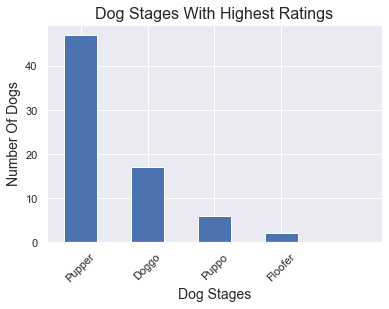

In [228]:
data.plot(kind = 'bar')

x1 = [0,1,2,3]
labels = ['Pupper', 'Doggo', 'Puppo', 'Floofer']
plt.xticks(x1, labels, rotation=45)
plt.ylabel('Number Of Dogs', fontsize = 14)
plt.xlabel('Dog Stages', fontsize = 14)
plt.title('Dog Stages With Highest Ratings', fontsize = 16)
plt.show()


*Not including the unknown dog stages showed those within the Pupper stages of their life were dominant among the tweets with a value of about 47 as displayed by the graph and the Floofer groups being the least as shown by the stats displayed earlier on*

## What are the likes most associated to tweets?

*Lets first find out the most common like counts for the various tweets*

In [229]:
# Finding out the unique counts for a particular number of like
df_master.num_of_likes.value_counts()

2176     3
345      3
610      3
2918     3
2706     3
        ..
20539    1
5760     1
8021     1
4149     1
2535     1
Name: num_of_likes, Length: 1830, dtype: int64

*  *It appears the **"most common likes for tweets doesn't seem to come that often"** and hence do not exceed three, that is, the same number of likes given to a tweet would most likely be 3, if a tweet receives **"200"** likes, it is most likely it is most likely that the same number of likes would come up not more than two times for some other tweets in the future*
*  *Lets now find out the number of like numbers that appeeared exactly three times*

In [230]:
# getting the number of likes that appeared the most
a = df_master[['num_of_likes']].value_counts() == 3    # 3 was the highest number of times a certain number of like count showed up

a.head(10) #head = 7 since the first 7 values had value counts of 3

num_of_likes
2768             True
610              True
2706             True
2918             True
345              True
1691             True
2176             True
2169            False
1674            False
3837            False
dtype: bool

In [231]:
# Determining number of counts for Trues and False values within a
a.value_counts()

False    1823
True        7
dtype: int64

*There appears to be **"7"** unique values that meets the highest frequency for the number of likes received by a tweet*

In [232]:
# getting the index of a which is value with seek for in this case
possible_likes = a.index.tolist()[0:7]
possible_likes

[(2768,), (610,), (2706,), (2918,), (345,), (1691,), (2176,)]

*The values within the list **"possible_likes"** thus represents the number of likes that is tweet is most likely receive as shown by the stats computed earlier*

## What is the relationship betweeen the number of likes and the retweet counts?

*Lets have a brief description of the two columns involved in this case*

In [233]:
df_master[['num_of_likes','retweet_count']].describe()

,num_of_likes,retweet_count
count,1971.000000,1971.000000
mean,8921.838153,2767.880771
std,12260.445319,4687.479281
min,81.000000,16.000000
25%,1956.500000,622.500000
50%,4134.000000,1350.000000
75%,11347.500000,3222.000000
max,132810.000000,79515.000000


*A brief look at the stats displayed shows the two variables seem to increase gradually as they evolve. The two graphs are more likely to have a linear relationship as they all seem to increase with time. Comparing the mean values to the values displayed shows **majority of the variables may fall within the interquartile range**, that is, between the 3rd andf 1st Quartiles of the data as the difference seems very high from the 75th percentile to the maximum value*

*A scatter would most likely yield the best result in terms of comparing these two entities since these are only two variables which are quantitative hence the scatter plot*
* *Using seaborns library:*

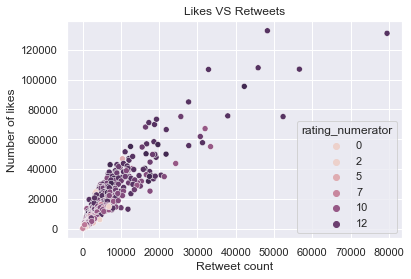

In [234]:
# Scatter plot to show the relation between the numbrer of likes and retweets for a tweet
ax = sns.scatterplot(x='retweet_count', y='num_of_likes', data=df_master,
                     hue='rating_numerator', hue_norm=(3, 15)) 
rcParams['figure.figsize'] = 14,6
ax.set(xlabel='Retweet count', ylabel='Number of likes', title='Likes VS Retweets')
plt.show()


*The graph displayed shows a linear relationship between the two variables. It displays a very **strong correlation** between the two variables which seems reasonable in this case*
*  *A tweet with a greater number of likes would most likely mean it was many people did appreciate the post hence the tendency to share it for others as well of which in this case, is recognized by the number of retweets. Hence, **an increase in the number of likes a tweet receives being directly proportional to the number of that tweets** retweet counts as well*
*  *Most of the tweets as indicated from the graph did recieve likes and retweet counts of **"40K"** and **"10K"** respectively*
*  *The hue, **rating_numerator** used in the plot as well also showed tweets that received higher ratings did actually receive higher number of likes and retweet counts as well*

# LIMITATION
> *The limitations with this project includes names for the dogs that may have have seemed inconsistent but could not really tell as these were related to dogs and could have such names under normal circumstance.*

> *A visual assessment of the twitter archive csv file had some names associated with more than a single stage of their life but the graph seemed not to displa as such*

# References
* *The slack community*
* *https://knowledge.udacity.com/questions/30335*
* *https://knowledge.udacity.com/questions/280182*
* *https://knowledge.udacity.com/questions/24594*
* *https://researchdatapod.com/how-to-solve-python-jsondecodeerror-extra-data/*
* *https://www.youtube.com/watch?v=d0jvEz4bCso*
* *https://code.i-harness.com/en/q/19c9fbc*
* *https://researchdatapod.com/how-to-solve-python-attributeerror-str-object-has-no-attribute-read/*
* *https://galeascience.wordpress.com/2016/03/18/collecting-twitter-data-with-python/*
* *https://udacity.zendesk.com/hc/en-us/articles/360060039651-ND002-Data-Analy*
* *https://stackoverflow.com/questions/12309269/how-do-i-write-json-data-to-a-file*
* *https://thewebdev.info/2022/04/16/how-to-fix-permissionerror-errno-13-permission-denied-with-python-open/*
* *https://stackoverflow.com/questions/23870808/oserror-errno-13-permission-denied*
* *https://stackoverflow.com/questions/53198665/typeerror-expected-str-bytes-or-os-pathlike-object-not-io-textiowrapper*
* *https://stackoverflow.com/questions/41631873/how-to-read-json-txt-and-parse-json-python-read-txt-python*
* *https://www.tutorialspoint.com/how-to-read-json-file-in-python*
* *https://stackoverflow.com/questions/47857154/how-to-read-json-object-in-python*
* *https://stackoverflow.com/questions/71043520/json-decoder-jsondecodeerror-extra-data-line-2-column-1-char-2167*
* *https://pythonguides.com/pandas-replace-multiple-values/*